In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT, windows
import librosa

In [2]:
# vemos los archivos de audio 
data_folder = os.path.join('..','codigo', 'data', 'train')  # carpeta del training set
classes_folders = os.listdir(data_folder)                   # carpeta de cada clase

# Creamos un diccionario para cada clase donde pondremos los audios
data = {}
for c in classes_folders:
    if c[0] != '.':
        data[c] = data.get(c, []) # agregamos 

# Llenamos una lista para cada clase con los datos
for c in classes_folders:
    if c[0] != '.':
        for f in os.listdir(os.path.join(data_folder, c)):
            path = os.path.join(data_folder, c, f)
            audio, sr = librosa.load(os.path.join(data_folder, c, f) , sr=None)  # leemos el audio como numpy array
            data[c].append(audio)   # no guardamos el samplerate porque todos son iguales

# Inspección de los datos

for k in data.keys():
    print(f'La clase {k} tiene {len(data[k])} elementos')

La clase colectivo tiene 5 elementos
La clase moto tiene 3 elementos
La clase auto tiene 3 elementos


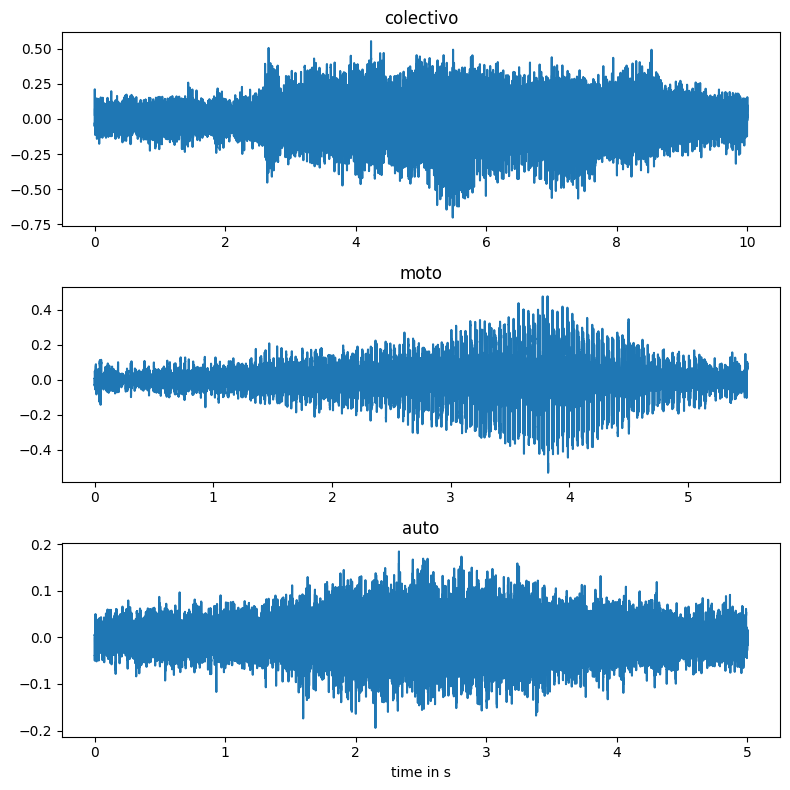

In [3]:
# dibujamos algun datito
rng = np.random.default_rng()
sr = 22050
keys = list(data.keys())
fig, axs = plt.subplots(3,1, figsize = (8,8))
for i in range(3):
    idx = rng.integers(len(data[keys[i]]))
    signal = data[keys[i]][idx]
    axs[i].set_title(keys[i])
    axs[i].plot(np.arange(len(signal))/sr, signal)
axs[i].set_xlabel(f'time in s')
fig.tight_layout()

In [38]:
def create_specs(x, ws, sr):
    '''Wrapper para calcular los espectrogramas de manera sencilla
    Regresa las frecuencias, los intervalos de tiempo y el espectrograma normalizado entre 0 y 1'''
    N = len(x)
    SFT = ShortTimeFFT(windows.boxcar(400), hop=400, fs=sr, scale_to='magnitude')
    ts = SFT.delta_t * np.arange(N)/ws
    Sx = SFT.spectrogram(x)  # perform the STFT
    Sx /= Sx.max()
    
    return SFT.f, ts[::ws], Sx

In [39]:
# para hacer un entrenamiento vamos a utilizar como features los espectrogramas
ws = 220  # Ancho de la ventana temporal
spects = {}         # creamos listas vacías
for k in data.keys():
    spects[k] = spects.get(k, [])

# llenamos las listas con espectrogramas
for k in data.keys():
    for d in data[k]:
        spec = create_specs(d, ws=400, sr = 22050)
        spects[k].append(spec)


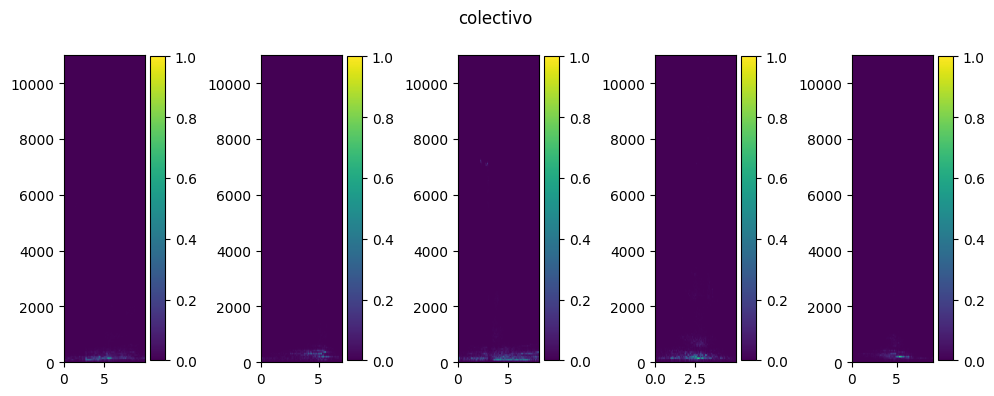

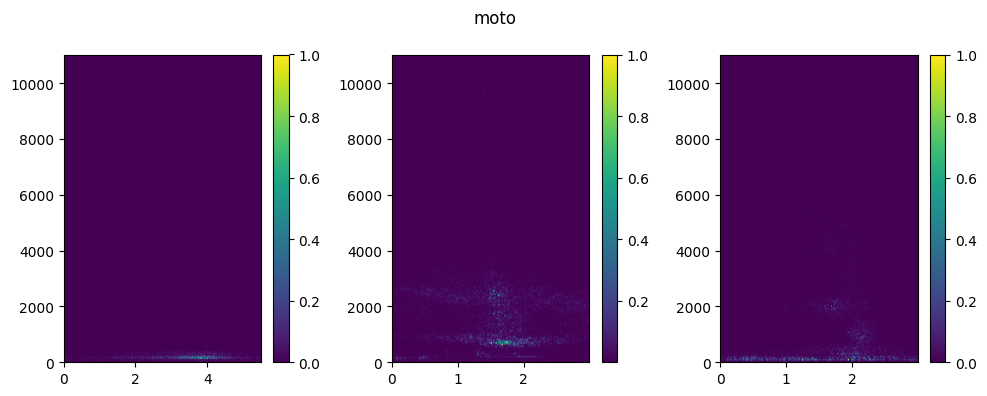

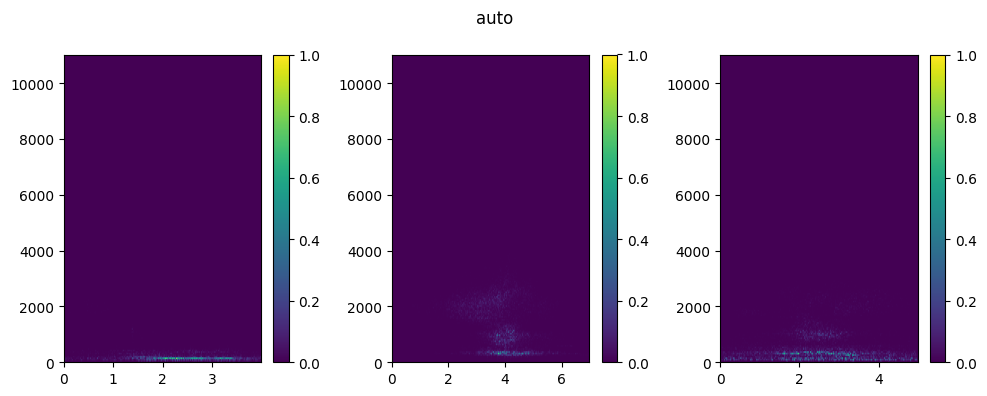

In [44]:
for k in spects.keys():
    i=0
    plt.figure(figsize=(10,4))
    for s in spects[k]:
        i += 1
        plt.subplot(1, len(spects[k]), i)
        plt.imshow(s[2], origin='lower', extent=[s[1][0],s[1][-1],s[0][0], s[0][-1]], aspect='auto', interpolation=None)
        plt.colorbar()
    plt.suptitle(k)
    plt.tight_layout()
    plt.show()